# KNN Modeling Exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare
import acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

In [3]:
train.shape, validate.shape, test.shape

((533, 14), (178, 14), (178, 14))

In [4]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
627,627,1,1,female,21.0,0,0,77.9583,S,First,Southampton,1,0,1
390,390,1,1,male,36.0,1,2,120.0000,S,First,Southampton,0,0,1
492,492,0,1,male,55.0,0,0,30.5000,S,First,Southampton,1,0,1
622,622,1,3,male,20.0,1,1,15.7417,C,Third,Cherbourg,0,0,0
243,243,0,3,male,22.0,0,0,7.1250,S,Third,Southampton,1,0,1


In [5]:
x_cols = ['pclass', 'age', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [6]:
X_train.head()

,pclass,age,alone,fare
627,1,21.0,1,77.9583
390,1,36.0,0,120.0000
492,1,55.0,1,30.5000
622,3,20.0,0,15.7417
243,3,22.0,1,7.1250


In [7]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.969880,0.965174,0.968105,0.967527,0.968079
recall,0.978723,0.950980,0.968105,0.964852,0.968105
f1-score,0.974281,0.958025,0.968105,0.966153,0.968059
support,329.000000,204.000000,0.968105,533.000000,533.000000


In [8]:
# confusion_matrix
pd.crosstab(y_pred, y_train)

survived,0,1
row_0,,
0,322,10
1,7,194


In [9]:
def get_classification_metrics(model):
    '''
    Returns a dictionary of classification metrics on the validate split given a fitted model.
    
    Relies on X_validate and y_validate being globally defined.
    '''
    predictions = model.predict(X_validate)
    return {
        'tpr/recall': recall_score(y_validate, predictions),
        'tnr/specificity': recall_score(y_validate, predictions, pos_label=0),
        'fpr': 1 - recall_score(y_validate, predictions, pos_label=0),
        'fnr': 1 - recall_score(y_validate, predictions),
        'f1': f1_score(y_validate, predictions),
    }

In [10]:
get_classification_metrics(knn1)

{'tpr/recall': 0.5735294117647058,
 'tnr/specificity': 0.7181818181818181,
 'fpr': 0.28181818181818186,
 'fnr': 0.42647058823529416,
 'f1': 0.5652173913043478}

In [11]:
# knn classifier with n_neighbour = 10

knn2 = KNeighborsClassifier(10)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.758442,0.750000,0.756098,0.754221,0.755211
recall,0.887538,0.544118,0.756098,0.715828,0.756098
f1-score,0.817927,0.630682,0.756098,0.724304,0.746261
support,329.000000,204.000000,0.756098,533.000000,533.000000


In [12]:
# confusion_matrix
pd.crosstab(y_pred, y_train)

survived,0,1
row_0,,
0,292,93
1,37,111


In [13]:
# knn classifier with n_neighbour = 20

knn3 = KNeighborsClassifier(20)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 20")
pd.DataFrame(report)

n_neighbour = 20


,0,1,accuracy,macro avg,weighted avg
precision,0.710280,0.761905,0.72045,0.736093,0.730039
recall,0.924012,0.392157,0.72045,0.658085,0.720450
f1-score,0.803170,0.517799,0.72045,0.660485,0.693948
support,329.000000,204.000000,0.72045,533.000000,533.000000


In [14]:
# confusion_matrix
pd.crosstab(y_pred, y_train)

survived,0,1
row_0,,
0,304,124
1,25,80


## Visualize Performance as a function of k

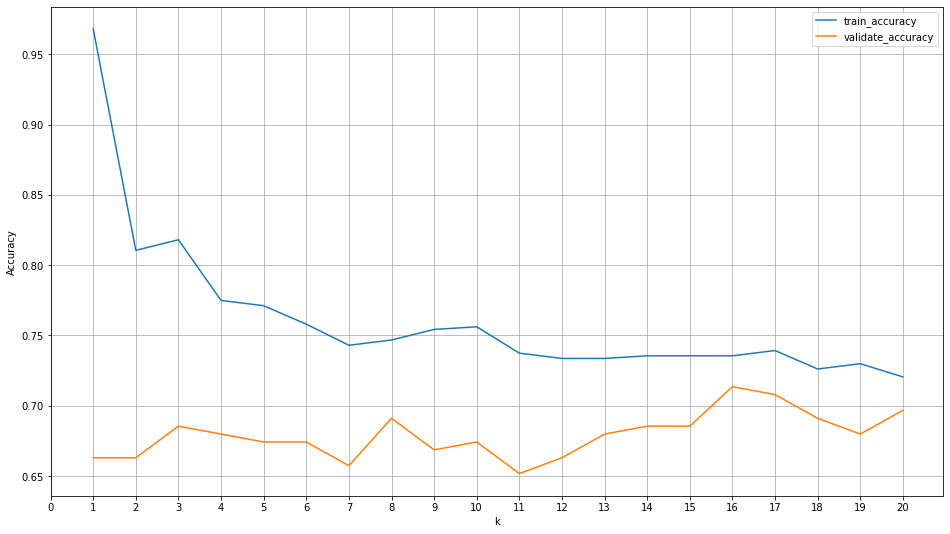

In [15]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()